# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
df = pd.read_csv('../data/Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()
# all numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.isna().sum()
# no missing values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
print(df['Channel'].value_counts())
print(df['Region'].value_counts())
# Both categorical

1    298
2    142
Name: Channel, dtype: int64
3    316
1     77
2     47
Name: Region, dtype: int64


In [7]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [8]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
# I would not delete outliers here. There are only 440 entries and 'not buying a lot of milk' is also a tendency.
# the proper answer is probably to drop a few % of outliers so.. dropping 2.5% from both end.
df['Fresh'].sort_values()[6: -6].index

Int64Index([ 65, 412, 353, 128, 304, 193, 355, 171,  81, 305,
            ...
             52, 129, 289,  29,  87,  47, 176, 239, 282, 259],
           dtype='int64', length=428)

In [10]:
# df = df.loc[df['Fresh'].sort_values()[4: -4].index]
# df = df.loc[df['Milk'].sort_values()[4: -4].index]
# df = df.loc[df['Grocery'].sort_values()[4: -4].index]
# df = df.loc[df['Frozen'].sort_values()[4: -4].index]
# df = df.loc[df['Detergents_Paper'].sort_values()[4: -4].index]
# df = df.loc[df['Delicassen'].sort_values()[4: -4].index]
#60 cols removed with only the most outliers

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [11]:
# I dont think this needs cleaning, if outliers need to be removed i can use the below to delete the few most outlyings:
# df = df.loc[df['Fresh'].sort_values()[4: -4].index]
# df = df.loc[df['Milk'].sort_values()[4: -4].index]
# df = df.loc[df['Grocery'].sort_values()[4: -4].index]
# df = df.loc[df['Frozen'].sort_values()[4: -4].index]
# df = df.loc[df['Detergents_Paper'].sort_values()[4: -4].index]
# df = df.loc[df['Delicassen'].sort_values()[4: -4].index]
#60 cols removed with only the most outliers

In [12]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [13]:
# Your import here:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [14]:
customers_scale = scaler.fit(df)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [15]:
from sklearn.cluster import KMeans

In [16]:
model = KMeans(n_clusters=8)
model.fit(df)
df['labels'] = model.labels_

In [17]:
pd.value_counts(model.labels_)

1    184
4    104
3     92
0     31
2     22
5      4
6      2
7      1
dtype: int64

Count the values in `labels`.

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [18]:
from sklearn.cluster import DBSCAN
scaler = StandardScaler()
clustering = DBSCAN()
X = StandardScaler().fit_transform(df.drop('labels', axis=1))
y_pred = clustering.fit_predict(X)

In [19]:
pd.value_counts(clustering.labels_)

-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
dtype: int64

Count the values in `labels_DBSCAN`.

In [20]:
df['labels_DBSCAN'] = clustering.labels_

In [21]:
from sklearn import metrics
labels_true = df['labels']
labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 8
Estimated number of noise points: 255
Homogeneity: 0.225
Completeness: 0.283
V-measure: 0.251
Adjusted Rand Index: 0.063
Adjusted Mutual Information: 0.198
Silhouette Coefficient: -0.131


C:\Users\feren\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

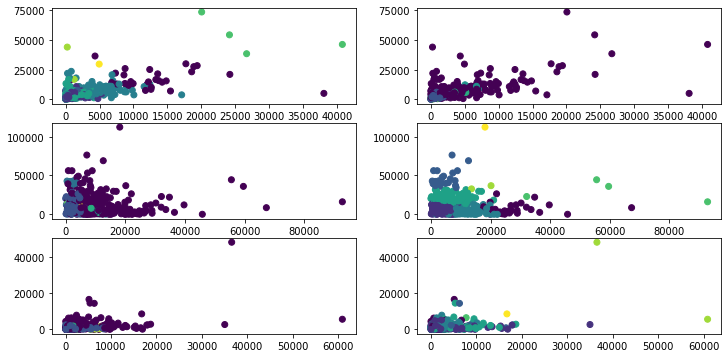

In [22]:
fig, axs = plt.subplots(3,2, figsize=(12,6))
axs[0,0].scatter(df['Detergents_Paper'], df['Milk'], c=df['labels'])
axs[0,1].scatter(df['Detergents_Paper'], df['Milk'], c=df['labels_DBSCAN'])

axs[1,0].scatter(df['Grocery'], df['Fresh'], c=df['labels_DBSCAN'])
axs[1,1].scatter(df['Grocery'], df['Fresh'], c=df['labels'])

axs[2,0].scatter(df['Frozen'], df['Delicassen'], c=df['labels_DBSCAN'])
axs[2,1].scatter(df['Frozen'], df['Delicassen'], c=df['labels'])

plt.show()

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [23]:
df.groupby('labels').describe()

Channel                                              Region            \
         count      mean       std  min  25%  50%  75%  max  count      mean   
labels                                                                         
0         31.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0   31.0  2.419355   
1        184.0  1.070652  0.256942  1.0  1.0  1.0  1.0  2.0  184.0  2.510870   
2         22.0  1.090909  0.294245  1.0  1.0  1.0  1.0  2.0   22.0  2.727273   
3         92.0  1.771739  0.422011  1.0  2.0  2.0  2.0  2.0   92.0  2.586957   
4        104.0  1.201923  0.403379  1.0  1.0  1.0  1.0  2.0  104.0  2.538462   
5          4.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0    4.0  3.000000   
6          2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    2.0  2.500000   
7          1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0    1.0  3.000000   

        ... Delicassen          labels_DBSCAN                                \
        ...        75%      max         count      mean       std  min  25%   
labels  ...                                                                   
0       ...    3003.50  16523.0          31.0 -1.000000  0.000000 -1.0 -1.0   
1       ...    1117.00   5137.0         184.0  1.076087  2.092055 -1.0 -1.0   
2       ...    2391.00  14351.0          22.0 -0.318182  1.286796 -1.0 -1.0   
3       ...    1913.00   7844.0          92.0 -0.402174  1.562330 -1.0 -1.0   
4       ...    2177.00  14472.0         104.0 -0.067308  1.547089 -1.0 -1.0   
5       ...    3824.25   6465.0           4.0 -1.000000  0.000000 -1.0 -1.0   
6       ...   37359.50  47943.0           2.0 -1.000000  0.000000 -1.0 -1.0   
7       ...    8550.00   8550.0           1.0 -1.000000       NaN -1.0 -1.0   

                       
        50%  75%  max  
labels                 
0      -1.0 -1.0 -1.0  
1       1.0  1.0  7.0  
2      -1.0 -1.0  2.0  
3      -1.0 -1.0  4.0  
4      -1.0  1.0  5.0  
5      -1.0 -1.0 -1.0  
6      -1.0 -1.0 -1.0  
7      -1.0 -1.0 -1.0  

[8 rows x 72 columns]

In [24]:
df.groupby('labels_DBSCAN').describe()

Channel                                              Region  \
                count      mean       std  min  25%  50%  75%  max  count   
labels_DBSCAN                                                               
-1              255.0  1.490196  0.500887  1.0  1.0  1.0  2.0  2.0  255.0   
 0                5.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0    5.0   
 1              130.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  130.0   
 2                5.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    5.0   
 3                5.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0    5.0   
 4                7.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0    7.0   
 5               22.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   22.0   
 6                6.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    6.0   
 7                5.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0    5.0   

                        ... Delicassen          labels                      \
                  mean  ...        75%      max  count      mean       std   
labels_DBSCAN           ...                                                  
-1             2.45098  ...    2500.50  47943.0  255.0  2.486275  1.481782   
 0             3.00000  ...     344.00    545.0    5.0  1.600000  1.341641   
 1             3.00000  ...    1051.75   2501.0  130.0  1.692308  1.268865   
 2             3.00000  ...    1242.00   1819.0    5.0  2.000000  0.000000   
 3             3.00000  ...     993.00   1080.0    5.0  3.000000  0.000000   
 4             3.00000  ...    2015.50   2158.0    7.0  3.000000  0.000000   
 5             1.00000  ...     739.25   2100.0   22.0  1.818182  1.367527   
 6             1.00000  ...     828.75   1693.0    6.0  1.000000  0.000000   
 7             2.00000  ...    1059.00   1113.0    5.0  1.000000  0.000000   

                                         
               min  25%  50%   75%  max  
labels_DBSCAN                            
-1             0.0  1.0  3.0  4.00  7.0  
 0             1.0  1.0  1.0  1.00  4.0  
 1             1.0  1.0  1.0  1.00  4.0  
 2             2.0  2.0  2.0  2.00  2.0  
 3             3.0  3.0  3.0  3.00  3.0  
 4             3.0  3.0  3.0  3.00  3.0  
 5             1.0  1.0  1.0  3.25  4.0  
 6             1.0  1.0  1.0  1.00  1.0  
 7             1.0  1.0  1.0  1.00  1.0  

[9 rows x 72 columns]

Which algorithm appears to perform better?

In [25]:
# K means is better for me.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

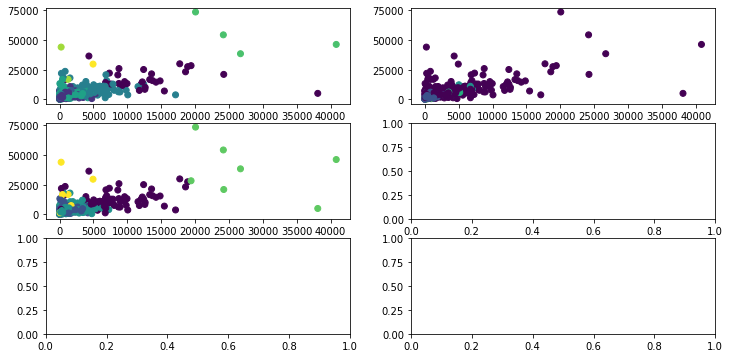

In [26]:
model = KMeans(n_clusters=5)
model.fit(df)
df['5cat'] = model.labels_
fig, axs = plt.subplots(3,2, figsize=(12,6))


axs[0,0].scatter(df['Detergents_Paper'], df['Milk'], c=df['labels'])
axs[0,1].scatter(df['Detergents_Paper'], df['Milk'], c=df['labels_DBSCAN'])
axs[1,0].scatter(df['Detergents_Paper'], df['Milk'], c=df['5cat'])
# 4 or 5 cat makes sense.

plt.show()

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [27]:
scaler = StandardScaler()
clustering = DBSCAN(eps=0.7)
X = StandardScaler().fit_transform(df.drop('labels', axis=1))
y_pred = clustering.fit_predict(X)

In [28]:
y_pred

array([ 0,  0, -1,  5, -1,  0, -1,  0,  1,  2,  9, -1, -1, -1, -1,  1,  3,
       -1,  4,  1,  4,  1, -1, -1, -1, -1,  1,  5, -1,  6,  7,  1,  5, -1,
        1,  0, -1, -1, -1, -1, -1,  7, -1,  9,  0, -1,  2, -1,  0, -1,  1,
        1, -1,  3,  5,  1, -1, -1,  5, -1, -1, -1,  0,  2,  1, -1, 16,  4,
       -1,  1, -1, -1, -1, -1,  0,  5, -1, -1,  1,  1,  1,  9,  0,  5, -1,
       -1, -1, -1, -1,  7,  1,  5, -1, -1,  3,  1, -1,  1,  1,  1, -1,  2,
        8, -1,  5,  5,  8,  2,  0, -1,  1,  2, -1,  5,  5,  1,  1,  1,  5,
        1,  5,  1,  1,  0, -1, -1,  5,  4, -1,  6,  1,  1,  5,  1,  1,  1,
       -1, -1,  7,  1,  7, -1, -1,  1,  5, -1,  1,  1,  1,  5,  5,  1,  5,
       -1,  1, -1, -1,  5,  8,  9,  8,  1,  5, -1,  0, -1,  0,  1,  1,  1,
        3, -1,  1,  9,  1,  3, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1,  9, -1, 17,  5,  1, -1,  1, 17, -1, -1, -1, 10, -1, -1, -1, 10,
       10, -1, 10, -1, 13, -1, 11, -1, 10, -1, -1, -1, -1, 11, -1, 10, 11,
       -1, 12, -1, 10, 10

In [29]:
labels_true = df['labels']
labels = clustering.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters: 18
Estimated number of noise points: 190
Homogeneity: 0.440
Completeness: 0.322
V-measure: 0.372
Adjusted Rand Index: 0.129
Adjusted Mutual Information: 0.283
Silhouette Coefficient: 0.058


C:\Users\feren\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


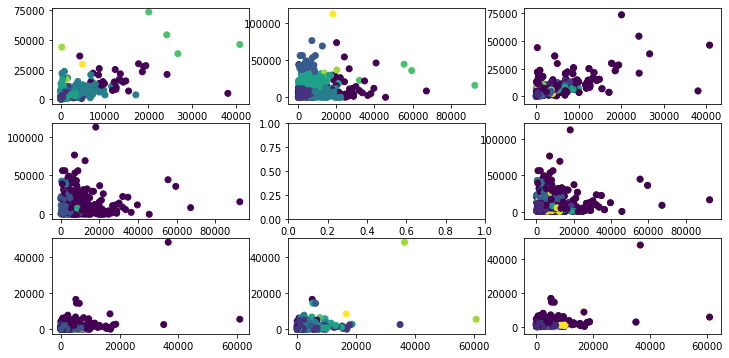

In [32]:
fig, axs = plt.subplots(3,3, figsize=(12,6))
axs[0,0].scatter(df['Detergents_Paper'], df['Milk'], c=df['labels'])
axs[0,1].scatter(df['Detergents_Paper'], df['Milk'], c=df['labels_DBSCAN'])
axs[0,2].scatter(df['Detergents_Paper'], df['Milk'], c=df['5cat'])
axs[0,2].scatter(df['Detergents_Paper'], df['Milk'], c=y_pred)


axs[1,0].scatter(df['Grocery'], df['Fresh'], c=df['labels_DBSCAN'])
axs[1,1].scatter(df['Grocery'], df['Fresh'], c=df['labels'])
axs[1,2].scatter(df['Grocery'], df['Fresh'], c=df['5cat'])
axs[1,2].scatter(df['Grocery'], df['Fresh'], c=y_pred)


axs[2,0].scatter(df['Frozen'], df['Delicassen'], c=df['labels_DBSCAN'])
axs[2,1].scatter(df['Frozen'], df['Delicassen'], c=df['labels'])
axs[2,2].scatter(df['Frozen'], df['Delicassen'], c=df['5cat'])
axs[2,2].scatter(df['Frozen'], df['Delicassen'], c=y_pred)


plt.show()